In [ ]:
!pip install rasterio
!pip install geopandas
!pip install patchify

     |████████████████████████████████| 19.3 MB 102 kB/s 
     |████████████████████████████████| 1.0 MB 7.8 MB/s 
     |████████████████████████████████| 6.3 MB 40.7 MB/s 
     |████████████████████████████████| 15.4 MB 40 kB/s 


In [ ]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/lizuoyue/ETH-Thesis

Cloning into 'ETH-Thesis'...
remote: Enumerating objects: 311, done.
remote: Counting objects: 100% (311/311), done.
remote: Compressing objects: 100% (285/285), done.
remote: Total 311 (delta 56), reused 187 (delta 24), pack-reused 0
Receiving objects: 100% (311/311), 159.17 MiB | 23.93 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [ ]:
import pandas as pd
import numpy as np
import rasterio
import cv2
import matplotlib.pyplot as plt
import geopandas as gd
import seaborn as sns
import os
from patchify import patchify

In [ ]:
sns.set(rc={'figure.figsize':(12,11)})

In [ ]:
path = '/content/drive/MyDrive/ai4good/Nairobi/2460_9855.tif'

In [ ]:
#different types of channels
infrared = cv2.imread(path, cv2.IMREAD_UNCHANGED)[:, :, 3]
gray = cv2.imread(path, 0) #change to 1 for color
img = cv2.imread(path, 1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

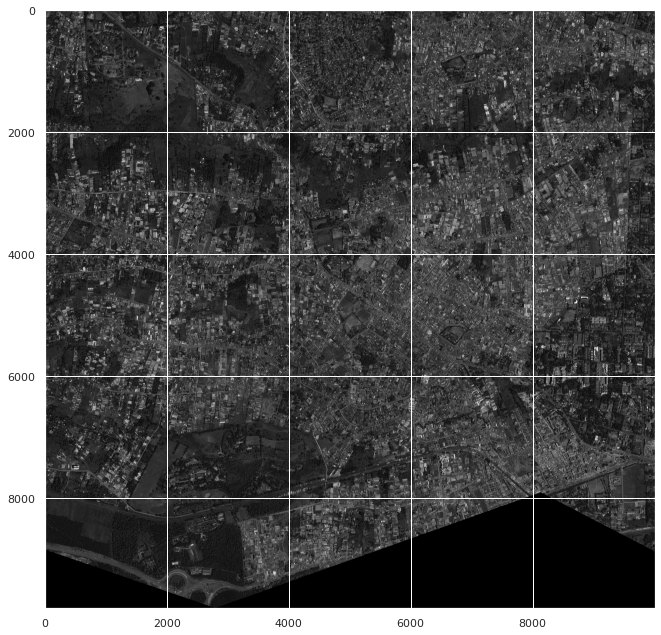

In [ ]:
#grayscale
plt.imshow(gray*5, cmap = 'gray')

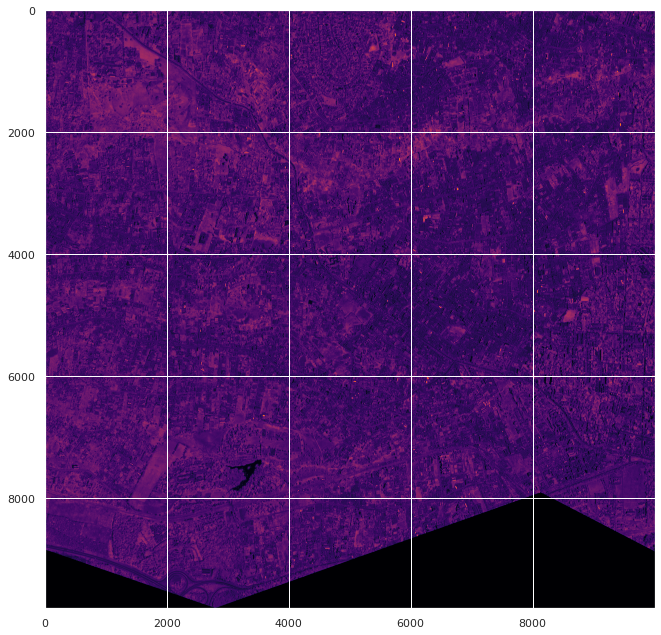

In [ ]:
#infrared image
plt.imshow(infrared, cmap = 'inferno')

In [ ]:
img.shape

(9803, 10000, 3)

In [ ]:
#Caveat: in order for unpatchify to work, 
#you need to create patchies with equal step size. e.g. 
#if the original image has width 3 and the patch has width 2, 
#you cannot really create equal step size patches with step size 2. 
#(first patch [elem0, elem1] and second patch [elem2, elem3], which is out of bound).
#The required condition for unpatchify to success is to have (width - patch_width) mod step_size = 0.
patches = patchify(img, (224, 224, 3), step = 224)

In [ ]:
patches = np.squeeze(patches)

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

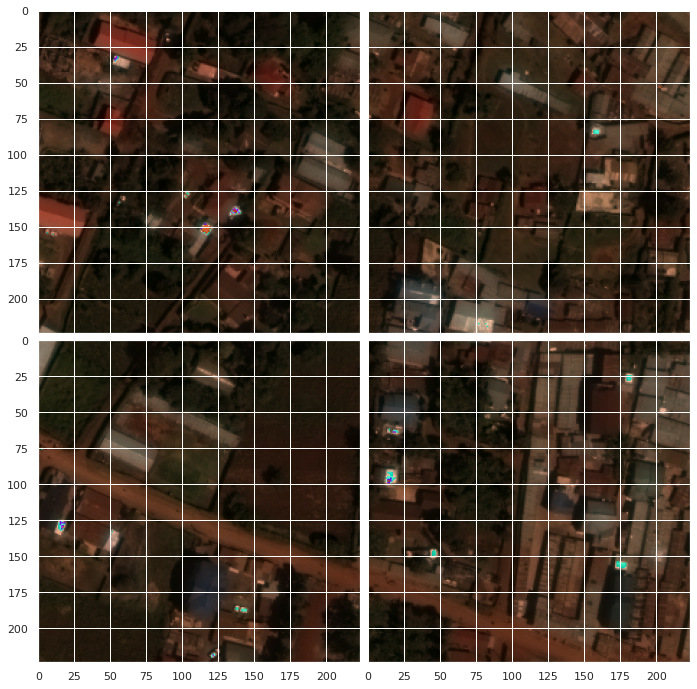

In [ ]:
fig = plt.figure(figsize=(12, 12))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [patches[1][0], patches[1][1], patches[2][0], patches[2][1]]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im*3)

plt.show()

In [ ]:
img

array([[[ 2,  5,  5],
        [ 1,  3,  3],
        [ 1,  4,  4],
        ...,
        [ 4,  9,  9],
        [ 5, 10, 11],
        [ 5, 10, 11]],

       [[ 1,  4,  4],
        [ 0,  3,  3],
        [ 1,  3,  3],
        ...,
        [ 5, 10, 10],
        [ 4,  9, 10],
        [ 5, 10, 11]],

       [[ 1,  4,  3],
        [ 1,  3,  3],
        [ 1,  3,  3],
        ...,
        [ 3,  8,  8],
        [ 5, 10, 10],
        [ 5, 10, 10]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [ ]:
#gets the upper left corner in UTM format
image_.transform*(0,0)

(246000.00000000035, 9860000.000000004)

In [ ]:
#should get the center of the image in coordinates if I understood correctly
image_.transform*(int(image_.width / 2), int(image_.height / 2))

(248500.00000000035, 9857549.500000004)

In [ ]:
image_.crs

CRS.from_epsg(32737)

In [ ]:
image_.indexes

(1, 2, 3, 4)

In [ ]:
limit = gd.read_file('/content/drive/MyDrive/ai4good/Nairobi (1)/Nairobi_Lim_Z37S.shp')

In [ ]:
limit

,Name,FolderPath,Shape_Leng,Shape_Le_1,Shape_Area,Area,geometry
0,AOI_Nairobi,AOI_Nairobi.kml,0.985683,0.985683,358.162676,358.37542,"POLYGON Z ((264186.951 9850861.035 0.000, 2603..."


In [ ]:
limit.geometry

0    POLYGON Z ((264186.951 9850861.035 0.000, 2603...
Name: geometry, dtype: geometry

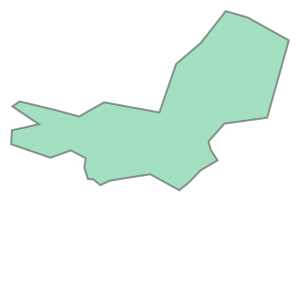

In [ ]:
limit.geometry[0]

In [ ]:
index = gd.read_file('/content/drive/MyDrive/ai4good/Nairobi (1)/Nairobi_idx_5x5.shp')

In [ ]:
index

,EXT_MIN_X,EXT_MIN_Y,EXT_MAX_X,EXT_MAX_Y,Sheet_Name,geometry
0,266000.0,9870000.0,271000.0,9875000.0,2660_9870,"POLYGON ((266000.000 9870000.000, 266000.000 9..."
1,271000.0,9870000.0,276000.0,9875000.0,2710_9870,"POLYGON ((271000.000 9870000.000, 271000.000 9..."
2,276000.0,9870000.0,281000.0,9875000.0,2760_9870,"POLYGON ((276000.000 9870000.000, 276000.000 9..."
3,261000.0,9865000.0,266000.0,9870000.0,2610_9865,"POLYGON ((261000.000 9865000.000, 261000.000 9..."
4,266000.0,9865000.0,271000.0,9870000.0,2660_9865,"POLYGON ((266000.000 9865000.000, 266000.000 9..."
5,271000.0,9865000.0,276000.0,9870000.0,2710_9865,"POLYGON ((271000.000 9865000.000, 271000.000 9..."
6,276000.0,9865000.0,281000.0,9870000.0,2760_9865,"POLYGON ((276000.000 9865000.000, 276000.000 9..."
7,241000.0,9860000.0,246000.0,9865000.0,2410_9860,"POLYGON ((241000.000 9860000.000, 241000.000 9..."
8,246000.0,9860000.0,251000.0,9865000.0,2460_9860,"POLYGON ((246000.000 9860000.000, 246000.000 9..."
9,251000.0,9860000.0,256000.0,9865000.0,2510_9860,"POLYGON ((251000.000 9860000.000, 251000.000 9..."


In [ ]:
index.crs

<Projected CRS: EPSG:32737>
Name: WGS 84 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, southern hemisphere between 80°S and equator, onshore and offshore. Kenya. Mozambique. Tanzania.
- bounds: (36.0, -80.0, 42.0, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich